In [1]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      2.2.2
asttokens                    3.0.0
astunparse                   1.6.3
certifi                      2025.4.26
charset-normalizer           3.4.2
colorama                     0.4.6
comm                         0.2.2
contourpy                    1.3.2
cycler                       0.12.1
debugpy                      1.8.14
decorator                    5.2.1
executing                    2.2.0
filelock                     3.18.0
flatbuffers                  25.2.10
fonttools                    4.58.0
fsspec                       2025.3.2
gast                         0.6.0
google-pasta                 0.2.0
grpcio                       1.71.0
h5py                         3.13.0
idna                         3.10
ipykernel                    6.29.5
ipython                      9.2.0
ipython_pygments_lexers      1.1.1
jedi                         0.19.2
Jinja2                       3.

In [2]:
import tensorflow as tf
import os

In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
tf.config.list_physical_devices('GPU')


[]

In [5]:
import cv2
import imghdr

C:\Users\admin\AppData\Local\Temp\ipykernel_17948\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [6]:
data_dir = 'data' 
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [7]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            if img is None:
                print('Unreadable image {}'.format(image_path))
                os.remove(image_path)
                continue
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            os.remove(image_path)

In [8]:
import numpy as np
from matplotlib import pyplot as plt


In [9]:
data = tf.keras.utils.image_dataset_from_directory('data', label_mode='int')

Found 311 files belonging to 3 classes.


In [10]:
data_iterator = data.as_numpy_iterator()

In [11]:
batch = data_iterator.next()

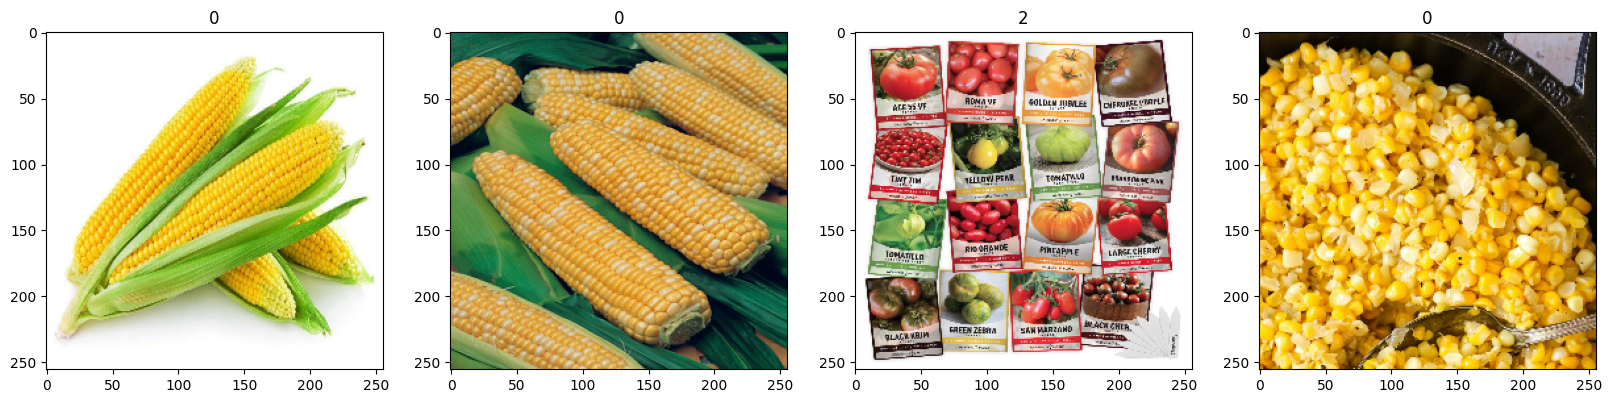

In [12]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [13]:
data = data.map(lambda x,y: (x/255, y))

In [14]:
data.as_numpy_iterator().next()

(array([[[[0.7929228 , 0.6719516 , 0.5479008 ],
          [0.69516695, 0.6057429 , 0.4219571 ],
          [0.55341697, 0.5244323 , 0.23238358],
          ...,
          [0.524863  , 0.5876081 , 0.33270615],
          [0.54758734, 0.614254  , 0.34758732],
          [0.583004  , 0.6300628 , 0.37123927]],
 
         [[0.7441182 , 0.6803161 , 0.5134284 ],
          [0.6441346 , 0.5976272 , 0.38384327],
          [0.50448835, 0.49441636, 0.18130362],
          ...,
          [0.5078891 , 0.57455575, 0.3078891 ],
          [0.53154105, 0.5982077 , 0.32797182],
          [0.5659467 , 0.6169271 , 0.34633884]],
 
         [[0.72075   , 0.7216317 , 0.5089614 ],
          [0.64234877, 0.6511034 , 0.39992383],
          [0.5297749 , 0.5515963 , 0.22080718],
          ...,
          [0.49262407, 0.5517035 , 0.28060344],
          [0.5154209 , 0.578166  , 0.29973462],
          [0.5495481 , 0.6005285 , 0.3260187 ]],
 
         ...,
 
         [[0.6526492 , 0.64232445, 0.36777636],
          [0.63649

In [15]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [16]:
train_size

7

In [17]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [18]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [20]:
model = Sequential()

In [21]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
num_classes = 3  # or: num_classes = len(data.class_names)
model.add(Dense(num_classes, activation='softmax'))

d:\Study stuff\08.VGU\First year\AIot\Image classification\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.compile('adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,697,139 (14.10 MB)

 Trainable params: 3,697,139 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
logdir='logs'

In [25]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [26]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 692ms/step - accuracy: 0.3957 - loss: 1.1802 - val_accuracy: 0.5156 - val_loss: 0.8763
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 633ms/step - accuracy: 0.7316 - loss: 0.6517 - val_accuracy: 0.7812 - val_loss: 0.5578
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 681ms/step - accuracy: 0.8731 - loss: 0.3565 - val_accuracy: 0.9062 - val_loss: 0.2949
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 638ms/step - accuracy: 0.9039 - loss: 0.2861 - val_accuracy: 0.9375 - val_loss: 0.1964
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 639ms/step - accuracy: 0.9302 - loss: 0.2029 - val_accuracy: 0.9844 - val_loss: 0.1092
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 606ms/step - accuracy: 0.9848 - loss: 0.0921 - val_accuracy: 0.9219 - val_loss: 0.1441
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 414ms/step - accuracy: 0.9689 - loss: 0.0874 - val_accuracy: 1.0000 - val_loss: 0.0605
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 250ms/step - accuracy: 0.9676 - loss: 0.0820 - val_accuracy: 1.0000 - val_loss

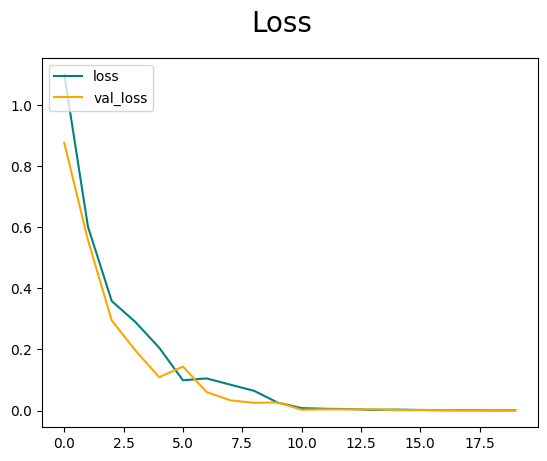

In [27]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

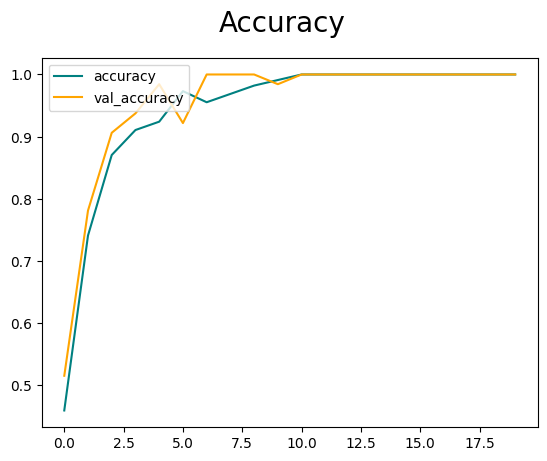

In [28]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [29]:
from tensorflow.keras.metrics import Precision, Recall, SparseCategoricalAccuracy

In [30]:
pre = Precision()
re = Recall()
acc = SparseCategoricalAccuracy()

In [31]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    yhat_labels = np.argmax(yhat, axis=1)  # Convert probabilities to class labels
    pre.update_state(y, yhat_labels)
    re.update_state(y, yhat_labels)
    acc.update_state(y, yhat_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


In [32]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.26086956, shape=(), dtype=float32)


In [33]:
import cv2

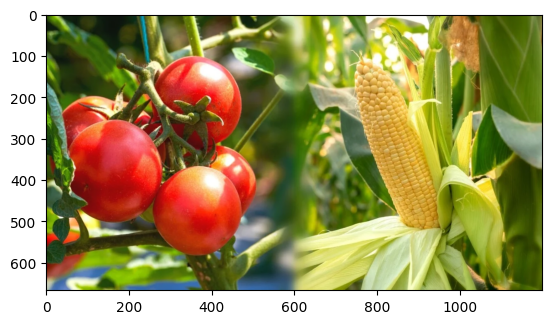

In [34]:
img = cv2.imread('corn.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
plt.imshow(img)
plt.show()

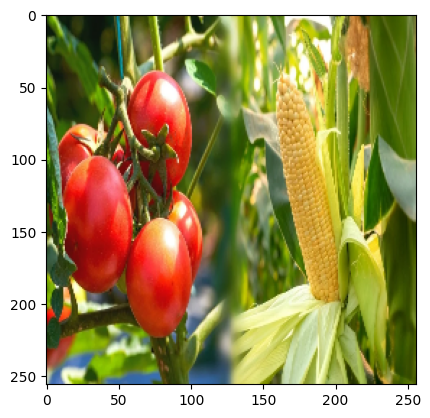

In [35]:

resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [36]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


In [37]:
yhat

array([[4.8821867e-02, 4.6997535e-09, 9.5117807e-01]], dtype=float32)